In [8]:
import numpy as np

from prml.utils.datasets import RegressionDataGenerator,ClassificationDataGenerator2,load_iris
from prml.utils.plot import plot_regression1D,plot_classifier
from prml.linear_classifier import Classifier 
from prml.linear_regression import LinearRegression

from prml.combining_models import (
    AdaBoost,
    CARTRegressor,
    CARTClassifier
)

# Commity 

In [2]:
class Commity():
    def __init__(self,M) -> None:
        self.M = M 
        self.model = [LinearRegression(basis_function="polynomial",deg=3) for _ in range(M)]
    
    def fit(self,X,y):
        n = len(X) 
        sample = int(n*0.8) 
        for i in range(self.M):
            idx = np.random.randint(0,n,sample) 
            X_bootstrap,y_bootstrap = X[idx],y[idx] 
            self.model[i].fit(X_bootstrap,y_bootstrap) 
    
    def predict(self,X):
        y_pred = self.model[0].predict(X) 
        for i in range(self.M-1):
            y_pred += self.model[i+1].predict(X)
        return y_pred/self.M 

RMSE : 0.1705096242134466


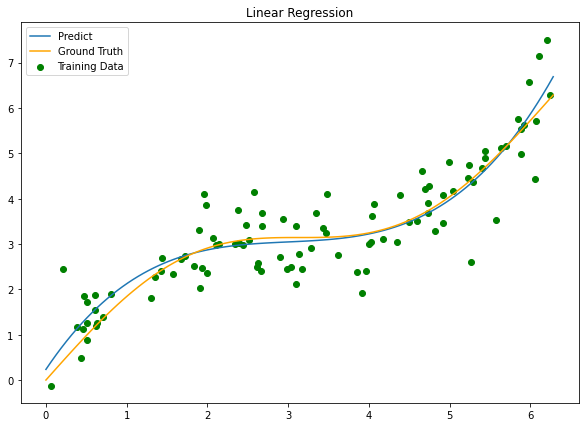

RMSE : 0.15316182729983313


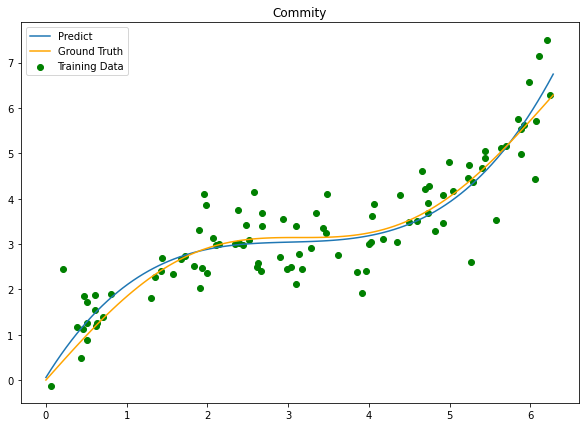

In [3]:
def f(x):
    return np.sin(x) + x 

generator = RegressionDataGenerator(f) 
X,y = generator(n=100,std=0.6) 

# in many cases, a commity model has worse results ..., maybe because of data size of each model is smaller than that of non commity model
lr = LinearRegression(basis_function="polynomial",deg=3) 
lr.fit(X,y)
plot_regression1D(X,y,lr,"Linear Regression",f)

com = Commity(M=5)
com.fit(X,y)
plot_regression1D(X,y,com,"Commity",f)

# AdaBoost

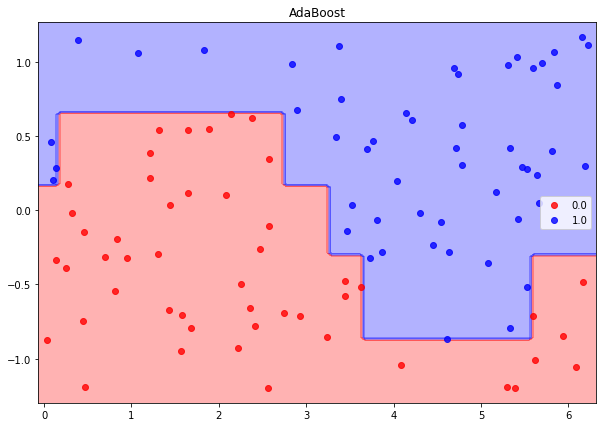

In [5]:
generator = ClassificationDataGenerator2(f=np.sin)
X,y = generator(n=100,x_lower=0,x_upper=2*np.pi,y_lower=-1.2,y_upper=1.2)

ab = AdaBoost(M=20)
ab.fit(X,y)
plot_classifier(X,y,ab,title="AdaBoost")

# CART

RMSE : 0.9993490170639022


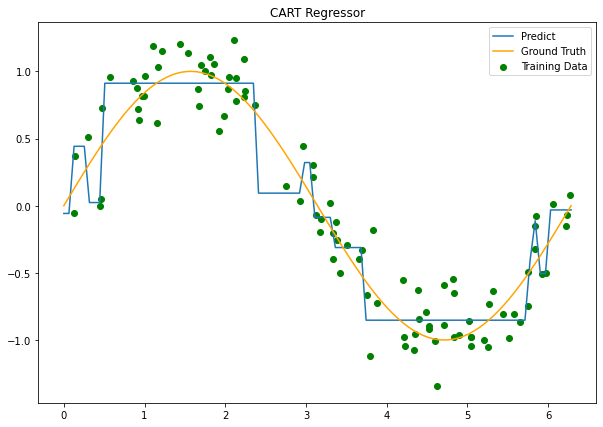

In [6]:
# regressor 
generator = RegressionDataGenerator(f=np.sin) 
X,y = generator(n=100,std=0.2)
cart = CARTRegressor(lamda=1e-2) 
cart.fit(X,y.ravel())
plot_regression1D(X,y,cart,title="CART Regressor",f=np.sin)

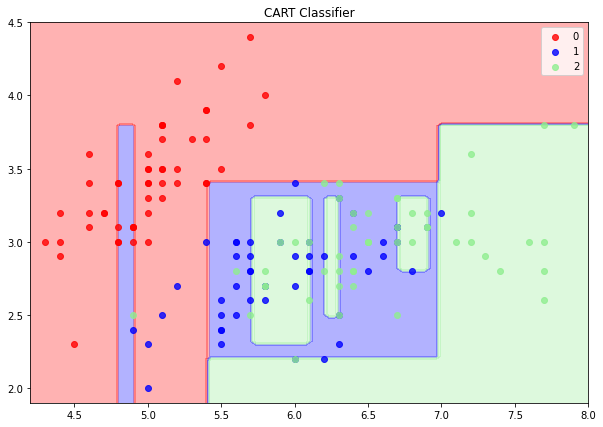

In [12]:
# classifier 
X,y = load_iris()
X = X[:,:2]
cart = CARTClassifier(lamda=1e-2,error_function="gini")
cart.fit(X,y)
plot_classifier(X,y,cart,title="CART Classifier")